# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Airbnb NYC "listings" data set: airbnbListingsData.csv

2. We will predict review_scores_value (the value score given by guests). The label is review_scores_value.

3. This is a supervised learning problem since we have labeled data for the target variable and it is a regression problem since we are predicting a continuous numerical score.

4. The features include: name, description, neighborhood_overview, instant_bookable, host_name, host_location, host_about, host_response_rate, host_acceptance_rate, host_is_superhost, host_listings_count, n_host_verifications, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month, review_scores_communication, review_scores_location.

5. Predicting listing value ratings helps guests in determining which listings offer the best value, improving recommendations. For hosts, it provides insights on what drives higher value ratings so they can adjust their listings. For Airbnb, it allows for higher revenue and better customer satisfaction.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

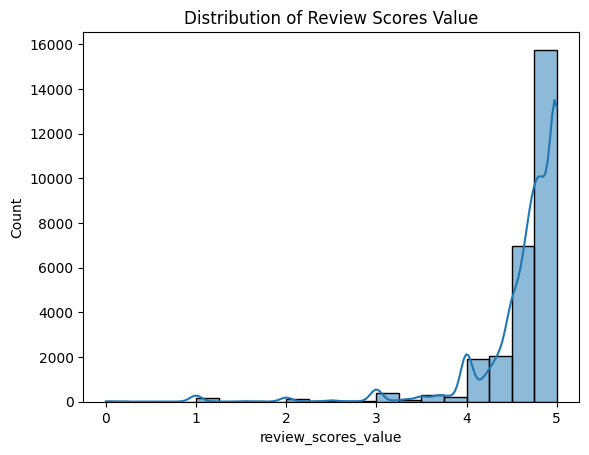

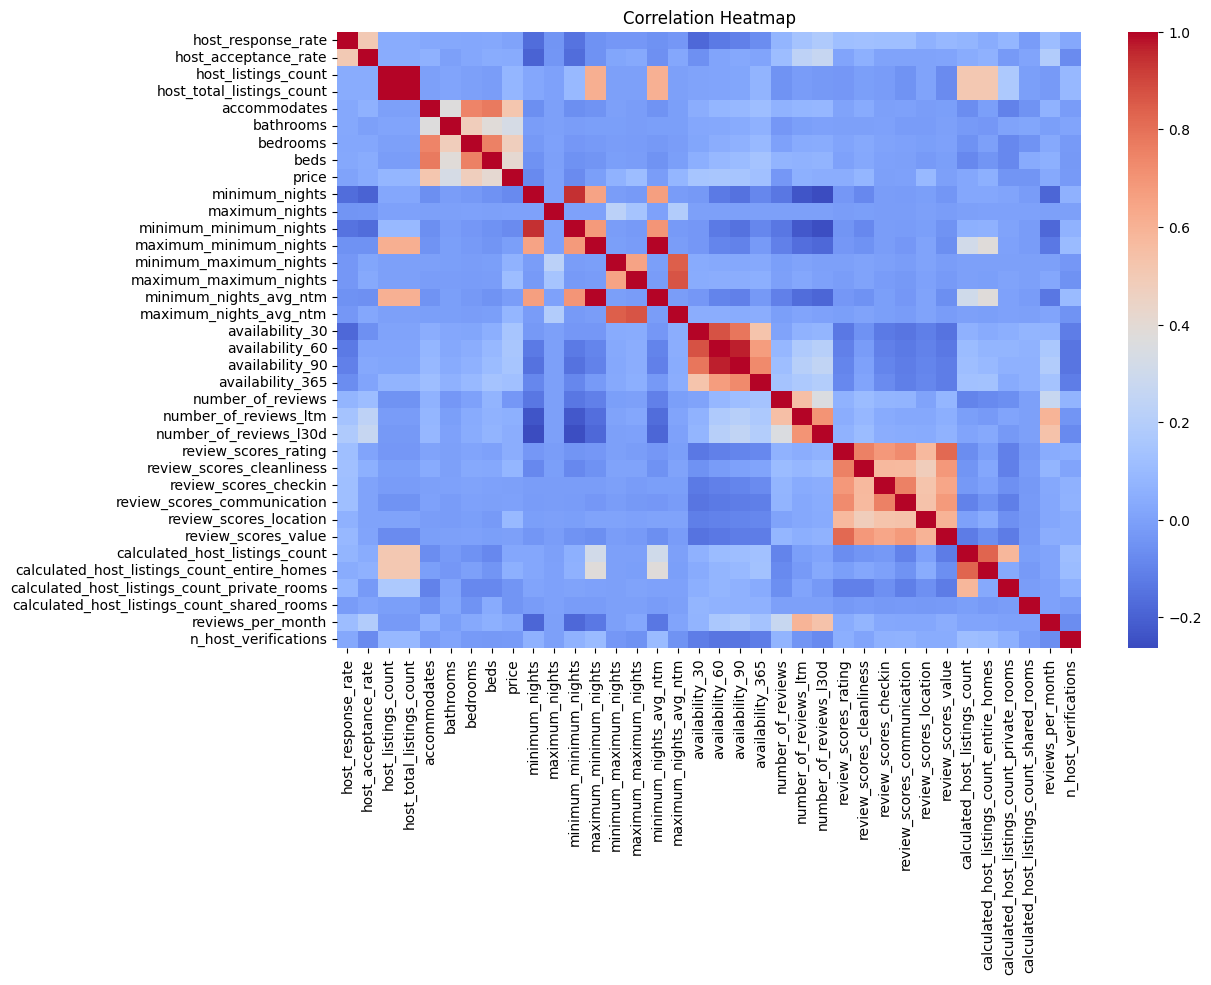

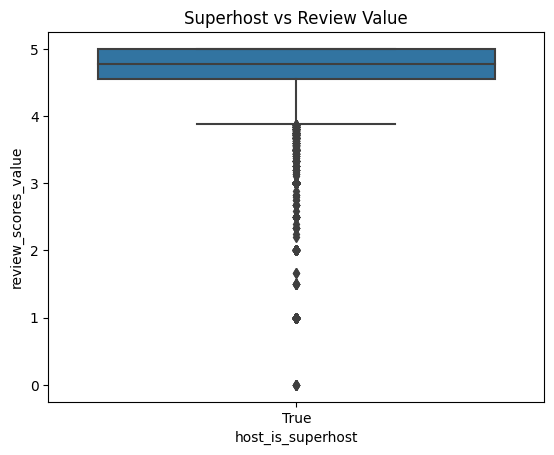

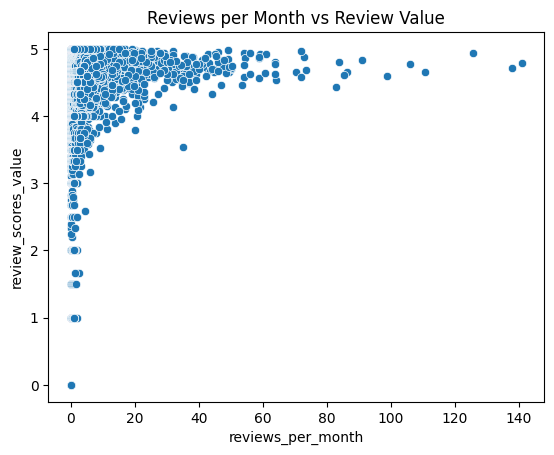

In [3]:
# Basic info
df.info()

# Summary stats
df.describe()

# Check missing values
df.isnull().sum().sort_values(ascending=False).head(20)

# Visualize target distribution
sns.histplot(df['review_scores_value'], bins=20, kde=True)
plt.title("Distribution of Review Scores Value")
plt.show()

# Correlation with target
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Relationship between some features and target
sns.boxplot(x='host_is_superhost', y='review_scores_value', data=df)
plt.title("Superhost vs Review Value")
plt.show()

sns.scatterplot(x='reviews_per_month', y='review_scores_value', data=df)
plt.title("Reviews per Month vs Review Value")
plt.show()


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. New Feature List: instant_bookable (binary: 0/1), host_response_rate, host_acceptance_rate, host_is_superhost, host_listings_count, n_host_verifications, calculated_host_listings_count*, reviews_per_month, review_scores_communication, review_scores_location.

2. I will impute missing values (mean for numerical, mode for categorical). I will also one-hot encode binary categorical fields, standardize numeric features, and remove outliers.

3. My baseline model will be linear regression and my advanced model will be Random Forest Regressor(with hyperparameter runing) and Gradient Boosting.

4. My train test split will be (80/20). I plan to use cross-validation and optimize hyperparemeters. To evaluate my model, I will use MAE, RSME, and R^2. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [8]:
# Select Features & Target
features = [
    'instant_bookable',
    'host_response_rate',
    'host_acceptance_rate',
    'host_is_superhost',
    'host_listings_count',
    'n_host_verifications',
    'calculated_host_listings_count',
    'reviews_per_month',
    'review_scores_communication',
    'review_scores_location'
]
target = 'review_scores_value'

X = df[features].copy()
y = df[target]

In [10]:
# Handle Missing Values

# Replace missing numeric values with column mean
for col in ['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
            'n_host_verifications', 'calculated_host_listings_count', 'reviews_per_month',
            'review_scores_communication', 'review_scores_location']:
    X[col].fillna(X[col].mean(), inplace=True)

# Replace missing binary (bool) with mode
for col in ['instant_bookable', 'host_is_superhost']:
    X[col].fillna(X[col].mode()[0], inplace=True)

# Convert booleans to integers (0/1)
X['instant_bookable'] = X['instant_bookable'].astype(int)
X['host_is_superhost'] = X['host_is_superhost'].astype(int)

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Baseline Model - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R^2:", r2_score(y_test, y_pred_lr))

Linear Regression Performance:
MAE: 0.2116654053857017
RMSE: 0.3541335461492667
R^2: 0.5394916035568732


In [15]:
# Advanced Model - Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R^2:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 0.22118365999335082
RMSE: 0.3733292354335826
R^2: 0.48821515867525933


In [16]:
# Hyperparameter Tuning for Random Forest
rf_tuned = RandomForestRegressor(
    n_estimators=300,  
    max_depth=15,      
    random_state=42
)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

print("\nTuned Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)))
print("R^2:", r2_score(y_test, y_pred_rf_tuned))


Tuned Random Forest Performance:
MAE: 0.214456286865408
RMSE: 0.36309216010925077
R^2: 0.5158976844584195


In [17]:
# Feature engineering
X['superhost_location_interaction'] = X['host_is_superhost'] * X['review_scores_location']

# Re-split data with new feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_tuned.fit(X_train, y_train)
y_pred_rf_interaction = rf_tuned.predict(X_test)

print("\nTuned RF with Interaction Feature Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf_interaction))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_interaction)))
print("R^2:", r2_score(y_test, y_pred_rf_interaction))


Tuned RF with Interaction Feature Performance:
MAE: 0.21459345901585478
RMSE: 0.3632196041409793
R^2: 0.5155577885026892


Tuning the Random Forest improved performance (R²: 0.488 → 0.516). However, adding the interaction feature did not improve predictive power.

In [20]:
gbr_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

print("\nGradient Boosting Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R^2:", r2_score(y_test, y_pred_gbr))


Gradient Boosting Performance:
MAE: 0.21384345450497383
RMSE: 0.36447110937483734
R^2: 0.5122136602932038


Linear regression outperformed all tree base models, suggesting that the relationship between the features and label is linear.

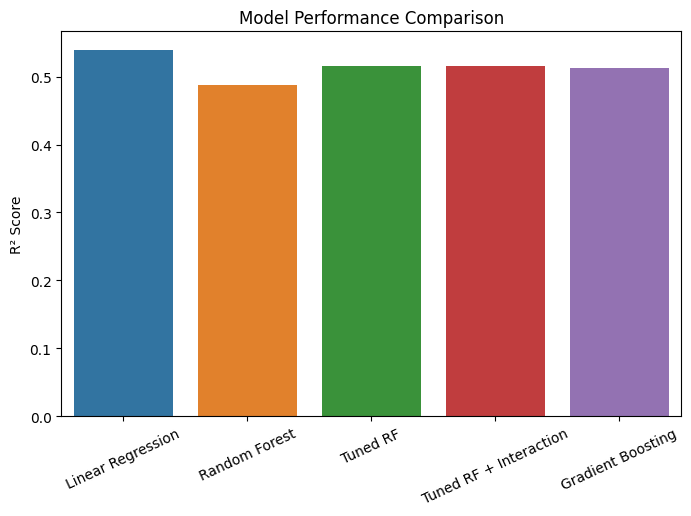

In [24]:
# Graph R² scores for all models
model_names = ['Linear Regression', 'Random Forest', 'Tuned RF', 'Tuned RF + Interaction', 'Gradient Boosting']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_rf_tuned),
    r2_score(y_test, y_pred_rf_interaction),
    r2_score(y_test, y_pred_gbr)
]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=r2_scores)
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=25)
plt.show()